In [1]:
import pandas as pd
from msresist.pre_processing import preprocessing
from msresist.clustering import MassSpecClustering, PSPLdict
import matplotlib.pyplot as plt
from msresist.figures.figure3 import plotMotifs

Matplotlib is building the font cache; this may take a moment.


In [2]:
X = preprocessing(Axlmuts_ErlAF154=True, Vfilter=True, FCfilter=True, log2T=True, mc_row=True)
d = X.select_dtypes(include=['float64']).T
i = X.select_dtypes(include=['object'])

pam_model = MassSpecClustering(i, ncl=6, SeqWeight=15, distance_method="PAM250_fixed", pre_motifs=["ABL", "EGFR", "ALK", "SRC", "YES"]).fit(d, "NA")

/home/asm/resistance-MS/msresist/clustering.py:155: RuntimeWarning: divide by zero encountered in log2
  pssm.loc[p_site, 5] = np.log2(clSeq.loc[p_site, 5] / tm)
/home/asm/resistance-MS/msresist/clustering.py:155: RuntimeWarning: divide by zero encountered in log2
  pssm.loc[p_site, 5] = np.log2(clSeq.loc[p_site, 5] / tm)
/home/asm/resistance-MS/msresist/clustering.py:155: RuntimeWarning: divide by zero encountered in log2
  pssm.loc[p_site, 5] = np.log2(clSeq.loc[p_site, 5] / tm)


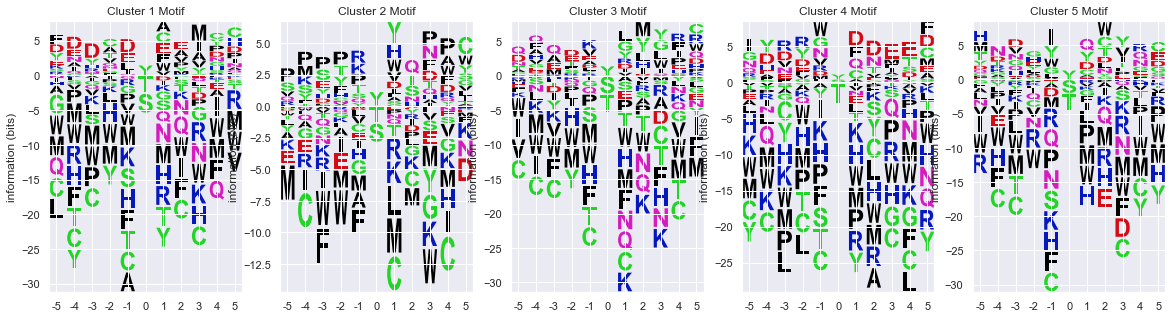

In [3]:
_, ax = plt.subplots(1, 5, figsize=(20, 5))

pssms = pam_model.pssms(PsP_background=True)
motifs = [pssms[0], pssms[1], pssms[2], pssms[3], pssms[4]]
plotMotifs(motifs, titles=["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"], axes=ax)

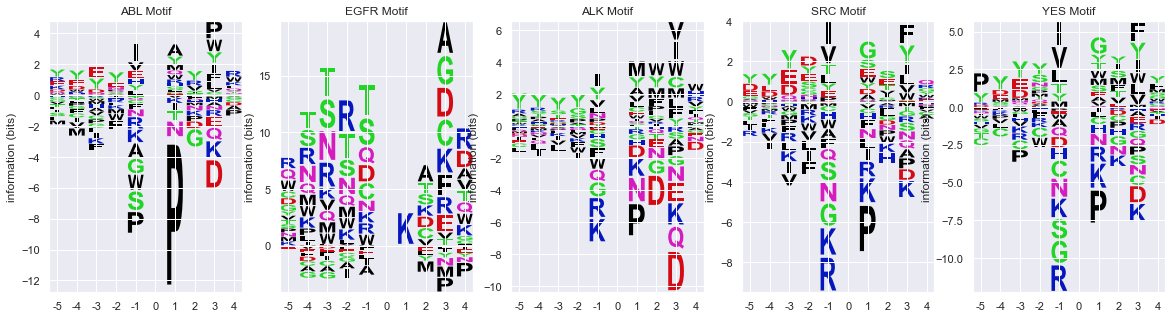

In [4]:
pspls = PSPLdict()
_, ax = plt.subplots(1, 5, figsize=(20, 5))
abl = pd.DataFrame(pspls["ABL"])
egfr = pd.DataFrame(pspls["EGFR"])
alk = pd.DataFrame(pspls["ALK"])
src = pd.DataFrame(pspls["SRC"])
yes = pd.DataFrame(pspls["YES"])
abl.index = pssms[0].index
egfr.index = pssms[0].index
alk.index = pssms[0].index
src.index = pssms[0].index
yes.index = pssms[0].index
plotMotifs([abl, egfr, alk, src, yes], titles=["ABL", "EGFR", "ALK", "SRC", "YES"], axes=ax)